## Order to Delivery (OTD) Time Forecasting

- Ease of e-commerce over the last decade, along with the recent COVID-19 pandemic, has seen a marked shift in consumer behavior and expectations when it comes to purchase - and more importantly, the delivery of goods. This has caused a paradigm shift in functioning of the supply chain. Along with delivery speed, consumers feel that the **transparency** around delivery time and shipment status are an equally important aspect of the fulfilment process. This has direct implications in customer churn/retention. More than half of consumers are less likely to shop with a retailer if the item is not delivered within 2 days of date promised. [(source)](https://www.hollingsworthllc.com/how-late-deliveries-impact-customer-retention/)

### Order to Delivery Time Forecasting as a Supply Chain Optimization Usecase:

**OTD forecasting is a key aspect of supply chain optimization as it helps to ensure that customers receive their products in a timely manner, it enables companies to make informed decisions about inventory, logistics and production which in turn helps to improve the overall efficiency of the supply chain.**

## AI Project Cycle  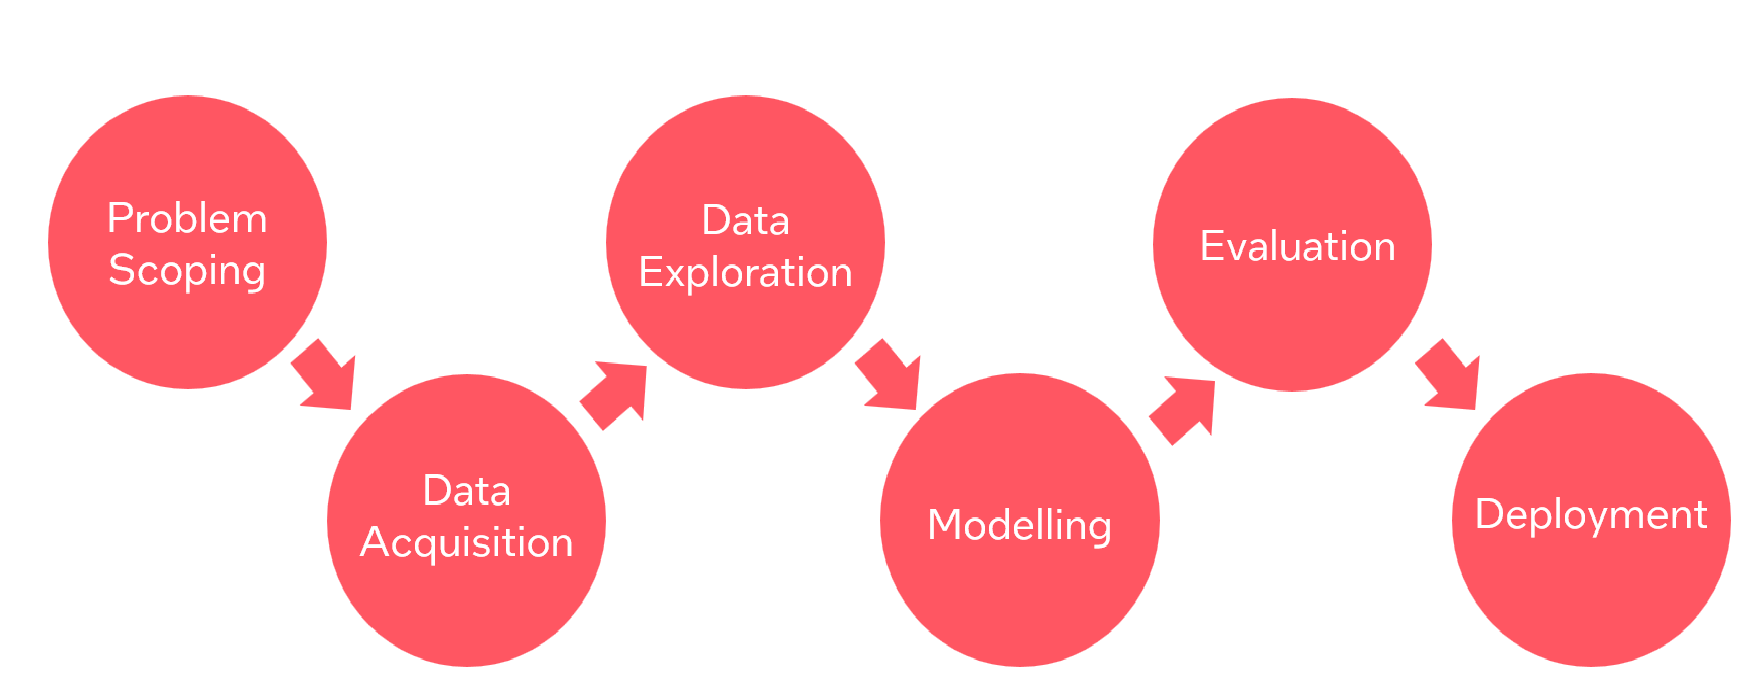

## Context: Understanding the Problem Statement --------Problem Scoping (AI Project Cycle - Step 1)

**An ML based predictive solution for providing delivery time forecasting**

-  An ML based predictive solution for providing delivery time forecasting can provide great insights to e-commerce platforms. From a customer-facing point of view these insights would help e-commerce platforms to give more accurate delivery forecasts to customers and decrease customer churn. In addition, the ML based predictive solution will also allow e-commerce platforms to take pre-emptive actions to mitigate delays, costs, and loss of revenue.

- For the individual components of the ensemble model, we will use XGB, RF and SVM. These components will then be fed to a Voting Model, which is an ensemble model that combines the individual predictions to provide a final, consensus prediction. The final consensus prediction can be (1) a prediction for a wait time for a package and (2) if a delay will occur.


![e2e-flow_stock](assets/e2e-flow_stock.png)

### Import the useful Packages & Libraries

In [2]:
from math import radians, sin, cos, asin, sqrt
# This line imports specific functions from the math library that are used for calculating the haversine distance between two points on a globe.

import pandas as pd
# This line imports the Pandas library, which is a popular library for data manipulation and analysis.

from sklearn.preprocessing import LabelEncoder, StandardScaler
# This line imports the LabelEncoder and StandardScaler classes from the scikit-learn library, which are used for preprocessing data for machine learning models.

import time
# This line imports the time module, which is used for timing the execution of code

import numpy as np
# This line imports the NumPy library, which provides support for numerical computing with Python.

To know more about math click [here](https://www.w3schools.com/python/module_math.asp)

To know more about pandas click [here](https://www.w3schools.com/python/pandas/default.asp)

To know more about Sklearn' Preprocessing package click [here](https://scikit-learn.org/stable/modules/preprocessing.html)

To know more about time click [here](https://docs.python.org/3/library/time.html)

To know more about numpy click [here](https://numpy.org/doc/stable/user/absolute_beginners.html)

## Dataset:  Data Acquisition (AI Project Cycle - Step 2)

**`Dataset downloading steps`**

**DataSet**: https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce

"brazilian-ecommerce.zip" will get downloaded in the current data folder folderd<br>
In the data folder execute the following command to unzip (Note: You may need to install unzip using: sudo apt-get install unzip)
unzip brazilian-ecommerce.zip


Source - 
Before we delve into the proposed architecture of the solution pipeline, it is critical to understand the dataset and its schema. The dataset consists of real-world delivery details sourced from a Brazilian E-commerce Company which was scrubbed and anonymized. It can be found [here](https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce?select=olist_order_items_dataset.csv).

It consists of multiple tables which include relevant information about the customer, seller, order, location etc. The individual tables are interconnected as shown in the following schema. Relevant features will be extracted/designed from this data and then be used to train our supervised ML model.

![dataset-schema](assets/dataset_schema.png)

### Load/Read the Dataset

In [3]:
orders = pd.read_csv("./data/olist_orders_dataset.csv")
# This line reads the CSV file "olist_orders_dataset.csv" located in the "./data/" directory and stores its contents as a Pandas DataFrame named "orders".

items = pd.read_csv("./data/olist_order_items_dataset.csv")
# This line reads the CSV file "olist_order_items_dataset.csv" located in the "./data/" directory and stores its contents as a Pandas DataFrame named "items".

customers = pd.read_csv("./data/olist_customers_dataset.csv")
# This line reads the CSV file "olist_customers_dataset.csv" located in the "./data/" directory and stores its contents as a Pandas DataFrame named "customers".

sellers = pd.read_csv("./data/olist_sellers_dataset.csv")  
# This line reads the "olist_sellers_dataset.csv" file and stores it in a DataFrame named "sellers".

geo = pd.read_csv("./data/olist_geolocation_dataset.csv")  
# This line reads the "olist_geolocation_dataset.csv" file and stores it in a DataFrame named "geo".

products = pd.read_csv("./data/olist_products_dataset.csv")  
# This line reads the "olist_products_dataset.csv" file and stores it in a DataFrame named "products".


'\nYour Code Here\n'

### View the data

In [4]:
orders.head()

# The code above assumes that a Pandas DataFrame named orders has been previously defined, and calls the head() method on that DataFrame.

# The head() method is used to display the first few rows of a DataFrame, by default the first five rows. This can be useful for quickly checking the structure and content of a DataFrame.

# So, this line of code will output the first five rows of the orders DataFrame, assuming it has been previously defined.

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [5]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [6]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [7]:
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


**From a business perspective, we need to tackle two main challenges to ensure transparency for the customer:**
1. Extracting insights/estimates into forecasted delivery
2. Increasing the accuracy of those insights and estimates

**We can achieve the first objective by implementing multiple pipelines with separate objectives and the second one by utilizing techniques such as ensemble modeling to increase the accuracy of stand-alone ML components.**

**A schematic of the proposed reference architecture is shown in the following figure. We start off with Data Ingestion from the multiple tables of the dataset, followed by merging and preprocessing for feature extraction. We can use the features to extract delivery insights in the form of **predicted wait time** as well as **likelihood of delivery delay**. 

**The former is a regression problem and the latter is a classification problem.**

## Data Preprocessing ------ Data Exploration(AI Project Cycle - Step 3)

### View the information of data

In [8]:
# info() helps summarize the dataset- It gives basic information like number of non-null values, datatypes and memory usage
# It is a good practise to start by this information
products.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [9]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [10]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [11]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


### Merge/Clean Data

To know more about how pandas dataframe merge function works click [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html)

In [12]:
# Get the seller zip code of each order

middle = items[['order_id', 'seller_id']]
# This line creates a new dataframe middle that contains only the order_id and seller_id columns from the items dataframe.

middle_2 = middle.merge(sellers[['seller_id', 'seller_zip_code_prefix']], on="seller_id", how="outer")
# This line merges the middle dataframe with the seller_id and seller_zip_code_prefix columns from the sellers dataframe, creating a new dataframe middle_2. The outer join type is used, which means that all rows from both dataframes are included in the merged dataframe, and missing values are filled with NaN.

orders = orders.merge(middle_2, on="order_id", how="left")
# This line merges the orders dataframe with the middle_2 dataframe on the order_id column, creating a new orders dataframe. The left join type is used, which means that all rows from the orders dataframe are included in the merged dataframe, and missing values from the middle_2 dataframe are filled with NaN.

orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,seller_id,seller_zip_code_prefix
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3504c0cb71d7fa48d967e0e4c94d59d9,9350.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,289cdb325fb7e7f891c38608bf9e0962,31570.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,4869f7a5dfa277a7dca6462dcf3b52b2,14840.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,66922902710d126a0e7d26b0e3805106,31842.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,2c9e548be18521d1c43cde1c582c6de8,8752.0


In [13]:
# Get customer zip code of each order
orders = orders.merge(customers[['customer_id', 'customer_zip_code_prefix']],
                  on='customer_id', how="left")
# The code above performs a left merge operation between two Pandas dataframes named "orders" and "customers" using the "customer_id" column as the joining key. It then selects the "customer_id" and "customer_zip_code_prefix" columns from the "customers" dataframe and merges them with the "orders" dataframe based on the matching "customer_id" column.


orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,seller_id,seller_zip_code_prefix,customer_zip_code_prefix
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3504c0cb71d7fa48d967e0e4c94d59d9,9350.0,3149
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,289cdb325fb7e7f891c38608bf9e0962,31570.0,47813
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,4869f7a5dfa277a7dca6462dcf3b52b2,14840.0,75265
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,66922902710d126a0e7d26b0e3805106,31842.0,59296
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,2c9e548be18521d1c43cde1c582c6de8,8752.0,9195


In [14]:
# Clean geo df
geo = geo[~geo['geolocation_zip_code_prefix'].duplicated()]
'''
This line first selects the 'geolocation_zip_code_prefix' column from the 'geo' DataFrame using the indexing operator []. The duplicated() method is then called on this column to create a boolean mask of rows that have duplicate values in this column.

The tilde operator (~) is used to invert this boolean mask, so that the mask contains True for rows that do not have duplicate values in this column.
'''

geo.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
5,1012,-23.547762,-46.635361,são paulo,SP


In [15]:
# add seller coordinates to the orders
orders = orders.merge(geo, left_on="seller_zip_code_prefix",
                      right_on="geolocation_zip_code_prefix", how="left")
'''
The code above performs a left join of two dataframes - "orders" and "geo" - using the "seller_zip_code_prefix" column of the "orders" dataframe and the "geolocation_zip_code_prefix" column of the "geo" dataframe as the join keys.
'''
                      
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,seller_id,seller_zip_code_prefix,customer_zip_code_prefix,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3504c0cb71d7fa48d967e0e4c94d59d9,9350.0,3149,9350.0,-23.680114,-46.452454,maua,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,289cdb325fb7e7f891c38608bf9e0962,31570.0,47813,31570.0,-19.810119,-43.984727,belo horizonte,MG
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,4869f7a5dfa277a7dca6462dcf3b52b2,14840.0,75265,14840.0,-21.362358,-48.232976,guariba,SP
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,66922902710d126a0e7d26b0e3805106,31842.0,59296,31842.0,-19.840168,-43.923299,belo horizonte,MG
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,2c9e548be18521d1c43cde1c582c6de8,8752.0,9195,8752.0,-23.551707,-46.260979,mogi das cruzes,SP


In [16]:
# add customer coordinates to the orders
orders = orders.merge(geo, left_on="customer_zip_code_prefix",
                      right_on="geolocation_zip_code_prefix", how="left",
                      suffixes=("_seller", "_customer"))
# This code merges two Pandas DataFrames, orders and geo, on a common column, customer_zip_code_prefix in orders and geolocation_zip_code_prefix in geo. The resulting merged DataFrame contains all the columns from both DataFrames.

In [17]:
# Clean orders
# 1-Filter out orders with multiple sellers Because each order only has one delivery date
df = orders.groupby(by="order_id").nunique()
# Groups the orders by order_id and calculates the number of unique values in each group using the nunique() method.

mono_orders = pd.Series(df[df['seller_id'] == 1].index)
# Selects the indices of the resulting DataFrame where the seller_id column equals 1 and stores them in a Pandas Series called mono_orders.

filtered_orders = orders.merge(mono_orders, how='inner')
# Merges the original orders DataFrame with mono_orders based on the order_id column using an inner join and stores the resulting DataFrame in a variable called filtered_orders.

In [18]:
# 2-drop rows with missing values
filtered_orders = filtered_orders.drop(columns=["order_approved_at"])
# This line drops the "order_approved_at" column from the filtered_orders DataFrame. This column is not necessary for the analysis being performed.

filtered_orders = filtered_orders.dropna()
# This line drops any rows in the filtered_orders DataFrame that contain missing values. This is a common data preprocessing step to ensure that the dataset is clean and complete.


filtered_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,seller_id,seller_zip_code_prefix,customer_zip_code_prefix,geolocation_zip_code_prefix_seller,geolocation_lat_seller,geolocation_lng_seller,geolocation_city_seller,geolocation_state_seller,geolocation_zip_code_prefix_customer,geolocation_lat_customer,geolocation_lng_customer,geolocation_city_customer,geolocation_state_customer
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3504c0cb71d7fa48d967e0e4c94d59d9,9350.0,3149,9350.0,-23.680114,-46.452454,maua,SP,3149.0,-23.574809,-46.587471,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,289cdb325fb7e7f891c38608bf9e0962,31570.0,47813,31570.0,-19.810119,-43.984727,belo horizonte,MG,47813.0,-12.169860,-44.988369,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,4869f7a5dfa277a7dca6462dcf3b52b2,14840.0,75265,14840.0,-21.362358,-48.232976,guariba,SP,75265.0,-16.746337,-48.514624,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,66922902710d126a0e7d26b0e3805106,31842.0,59296,31842.0,-19.840168,-43.923299,belo horizonte,MG,59296.0,-5.767733,-35.275467,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,2c9e548be18521d1c43cde1c582c6de8,8752.0,9195,8752.0,-23.551707,-46.260979,mogi das cruzes,SP,9195.0,-23.675037,-46.524784,santo andre,SP


In [19]:
# Define Function to calculate distance
def haversine_distance(lon1, lat1, lon2, lat2):
    """
    Compute distance between two pairs of (lat, lng)
    """
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2) ** 2 + cos(lat1) * cos(lat2) * sin(dlon / 2) ** 2
    return 2 * 6371 * asin(sqrt(a))

# This line defines a function called haversine_distance that takes four arguments: lon1, lat1, lon2, and lat2. These arguments represent the longitude and latitude coordinates of two points on the globe.

In [20]:
def get_package_size(items, products):
    # Get Package Size
    df_tmp = items[['order_id', 'product_id']].merge(products[['product_id', 'product_length_cm', 'product_height_cm',
                                                               'product_width_cm', 'product_weight_g']],
                                                     on="product_id",
                                                     how="outer")
    df_tmp.loc[:, "product_size_cm3"] = \
        df_tmp['product_length_cm']*df_tmp['product_width_cm'] * df_tmp['product_height_cm']
    orders_size_weight = df_tmp.groupby("order_id", as_index=False).sum()[['order_id', 'product_size_cm3',
                                                                           'product_weight_g']]
    return orders_size_weight

# The code above defines a function called get_package_size that takes two arguments: items and products, which are Pandas DataFrames containing information about products and the items ordered.

In [21]:
def object_to_int(dataframe_series):

    if dataframe_series.dtype == 'object':
        # This line checks if the data type of the input dataframe_series is "object", which typically represents string or categorical data.

        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
        # This line uses the LabelEncoder() method from the scikit-learn library to encode the string or categorical data as integers. This is a common preprocessing step in machine learning to convert non-numeric data into a format that can be used by algorithms. The fit_transform() method fits the encoder to the data and transforms it.
        
    return dataframe_series

In [22]:
#It gives the numerical statistical information of the dataframe
orders.describe()

'''
The code above applies the describe() method to a Pandas DataFrame called orders, which provides summary statistics of the data in the DataFrame. Here's a brief explanation of what each statistic means:

count: the number of non-missing values in each column
mean: the average value of each column
std: the standard deviation of each column
min: the minimum value of each column
25%: the first quartile of each column (25th percentile)
50%: the second quartile of each column (50th percentile, equivalent to the median)
75%: the third quartile of each column (75th percentile)
max: the maximum value of each column
The describe() method is useful for quickly getting an overview of the data in a DataFrame, including identifying potential outliers or unusual patterns in the data.
'''

"\nThe code above applies the describe() method to a Pandas DataFrame called orders, which provides summary statistics of the data in the DataFrame. Here's a brief explanation of what each statistic means:\n\ncount: the number of non-missing values in each column\nmean: the average value of each column\nstd: the standard deviation of each column\nmin: the minimum value of each column\n25%: the first quartile of each column (25th percentile)\n50%: the second quartile of each column (50th percentile, equivalent to the median)\n75%: the third quartile of each column (75th percentile)\nmax: the maximum value of each column\nThe describe() method is useful for quickly getting an overview of the data in a DataFrame, including identifying potential outliers or unusual patterns in the data.\n"

### Find the total number of missing values feature wise

In [23]:
# It returns the number of null values in the dataframe for every column feature
# Using info() we can view the number of non-null values whereas isnull() gives the number of null values
orders.isnull().sum()

order_id                                   0
customer_id                                0
order_status                               0
order_purchase_timestamp                   0
order_approved_at                        161
order_delivered_carrier_date            1968
order_delivered_customer_date           3229
order_estimated_delivery_date              0
seller_id                                775
seller_zip_code_prefix                   775
customer_zip_code_prefix                   0
geolocation_zip_code_prefix_seller      1028
geolocation_lat_seller                  1028
geolocation_lng_seller                  1028
geolocation_city_seller                 1028
geolocation_state_seller                1028
geolocation_zip_code_prefix_customer     306
geolocation_lat_customer                 306
geolocation_lng_customer                 306
geolocation_city_customer                306
geolocation_state_customer               306
dtype: int64

### Scaling the data

In [24]:
def scaling(X_train, X_test):
    '''
    The code above defines a function called scaling that performs feature scaling using the StandardScaler class from scikit-learn.
    '''
    sc_X = StandardScaler()
    X_train_scaled = sc_X.fit_transform(X_train)
    X_test_scaled = sc_X.fit_transform(X_test)
    return X_train_scaled, X_test_scaled

### Splitting dataset into separate training and test set 


In [25]:
def split_data(final_df, columns_for_train, columns_for_pred, i_flag):
    '''
    This function is a convenient way to split a DataFrame into training and testing sets for machine learning purposes. The i_flag parameter is used to avoid a warning message related to the NumPy library, and the columns_for_train and columns_for_pred parameters allow for flexible selection of features and target variables.
    '''

    if i_flag:
        from sklearnex import patch_sklearn  # pylint: disable=C0415, E0401
        patch_sklearn()
    from sklearn.model_selection import train_test_split  # pylint: disable=C0415

    x_train, x_test, y_train, y_test = train_test_split(final_df[columns_for_train], final_df[columns_for_pred],
                                                        test_size=0.3, random_state=42)
    return x_train, x_test, y_train, y_test

In [28]:
# Calculate distance between seller and customer using Haversine formula
filtered_orders['distance'] = filtered_orders.apply(lambda row: haversine_distance(row["geolocation_lng_seller"],
                                                                                   row["geolocation_lat_seller"],
                                                                                   row["geolocation_lng_customer"],
                                                                                   row["geolocation_lat_customer"]), 
                                                    axis=1)
# This line calculates the distance between seller and customer and stores it in the 'distance' column.

# Get product size and weight information
orders_size_weight = get_package_size(items, products)

# Debugging step: Check columns before merging
print("Columns in orders_size_weight:", orders_size_weight.columns)

# Rename columns if necessary
orders_size_weight = orders_size_weight.rename(columns={'size_cm3': 'product_size_cm3', 'weight_g': 'product_weight_g'})

# Merge product size & weight info into filtered_orders
filtered_orders = filtered_orders.merge(orders_size_weight, on='order_id', how='left')

# Debugging step: Check columns after merging
print("Columns in filtered_orders after merging:", filtered_orders.columns)

# Convert time columns to datetime format
time_columns = ['order_purchase_timestamp', 'order_delivered_customer_date', 'order_estimated_delivery_date']
for column in time_columns:
    filtered_orders[column] = pd.to_datetime(filtered_orders[column])

# Compute wait time and estimated wait time
filtered_orders["wait_time"] = (filtered_orders['order_delivered_customer_date'] - filtered_orders['order_purchase_timestamp']).dt.days
filtered_orders["est_wait_time"] = (filtered_orders['order_estimated_delivery_date'] - filtered_orders['order_purchase_timestamp']).dt.days

# Extract date-related features
filtered_orders["purchase_dow"] = filtered_orders["order_purchase_timestamp"].dt.dayofweek
filtered_orders["year"] = filtered_orders["order_purchase_timestamp"].dt.year
filtered_orders["purchase_month"] = filtered_orders["order_purchase_timestamp"].dt.month

# Debugging step: Check if required columns exist before selecting them
missing_columns = [col for col in ['product_size_cm3', 'product_weight_g'] if col not in filtered_orders.columns]
if missing_columns:
    print(f"Missing columns in filtered_orders: {missing_columns}")
else:
    print("All required columns are present.")

# Select relevant features for the final dataset
final_df = filtered_orders[['purchase_dow', 'purchase_month', 'year', 'product_size_cm3', 'product_weight_g',
                            'geolocation_state_customer', 'geolocation_state_seller', 'distance',
                            'wait_time', 'est_wait_time']]

# Calculate delay as a binary target variable
final_df['delay'] = (final_df['wait_time'] - final_df['est_wait_time']) > 0
final_df['delay'] = final_df['delay'].astype(int)

# Encode categorical variables into numerical values
final_df_enc = final_df.apply(lambda x: object_to_int(x))

# Display the first few rows
final_df_enc.head()


Columns in orders_size_weight: Index(['order_id', 'product_size_cm3', 'product_weight_g'], dtype='object')
Columns in filtered_orders after merging: Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'seller_id', 'seller_zip_code_prefix',
       'customer_zip_code_prefix', 'geolocation_zip_code_prefix_seller',
       'geolocation_lat_seller', 'geolocation_lng_seller',
       'geolocation_city_seller', 'geolocation_state_seller',
       'geolocation_zip_code_prefix_customer', 'geolocation_lat_customer',
       'geolocation_lng_customer', 'geolocation_city_customer',
       'geolocation_state_customer', 'distance', 'product_size_cm3_x',
       'product_weight_g_x', 'product_size_cm3_y', 'product_weight_g_y',
       'wait_time', 'est_wait_time', 'purchase_dow', 'year', 'purchase_month',
       'product_size_cm3', 'product_weight_g'],
      dtype='objec

C:\Users\ayanm\AppData\Local\Temp\ipykernel_15124\2389864980.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['delay'] = (final_df['wait_time'] - final_df['est_wait_time']) > 0
C:\Users\ayanm\AppData\Local\Temp\ipykernel_15124\2389864980.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['delay'] = final_df['delay'].astype(int)


,purchase_dow,purchase_month,year,product_size_cm3,product_weight_g,geolocation_state_customer,geolocation_state_seller,distance,wait_time,est_wait_time,delay
0,0,10,2017,1976.0,500.0,25,20,18.063837,8,15,0
1,1,7,2018,4693.0,400.0,4,7,856.292580,13,19,0
2,2,8,2018,9576.0,420.0,8,20,514.130333,9,26,0
3,5,11,2017,6000.0,450.0,19,7,1822.800366,13,26,0
4,1,2,2018,11475.0,250.0,25,20,30.174037,2,12,0


In [ ]:
# Export the final_df_enc DataFrame to a CSV file
final_df_enc.to_csv('Ayan_Week-04_Processed_Data.csv', index=False)

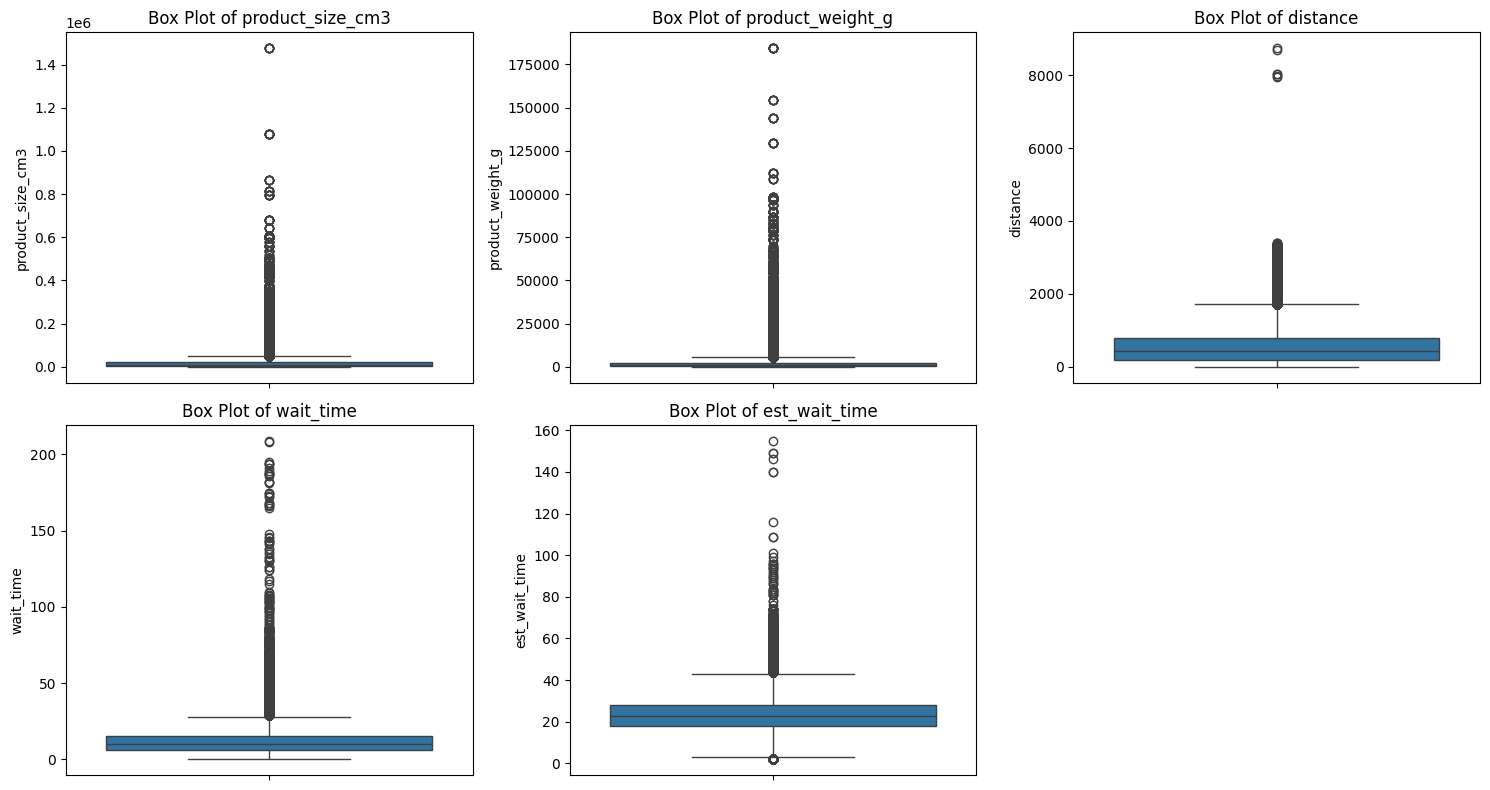

Outliers removed successfully!


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Ensure dataset is loaded
# If your dataset variable name is different, update it accordingly
if 'filtered_orders' not in locals():
    filtered_orders = pd.read_csv("final_OTD_time_forecasting_dataframe.csv")  # Load your dataset if not already loaded

# Identify numerical columns
num_cols = ['product_size_cm3', 'product_weight_g', 'distance', 'wait_time', 'est_wait_time']

# Check if columns exist in the dataset
missing_cols = [col for col in num_cols if col not in filtered_orders.columns]
if missing_cols:
    raise ValueError(f"Columns missing in dataset: {missing_cols}")

# Create box plots for each numerical column
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=filtered_orders[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

# Remove outliers using the IQR method
Q1 = filtered_orders[num_cols].quantile(0.25)
Q3 = filtered_orders[num_cols].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove rows where any numerical column has outliers
filtered_orders = filtered_orders[
    ~((filtered_orders[num_cols] < lower_bound) | (filtered_orders[num_cols] > upper_bound)).any(axis=1)
]

print("Outliers removed successfully!")


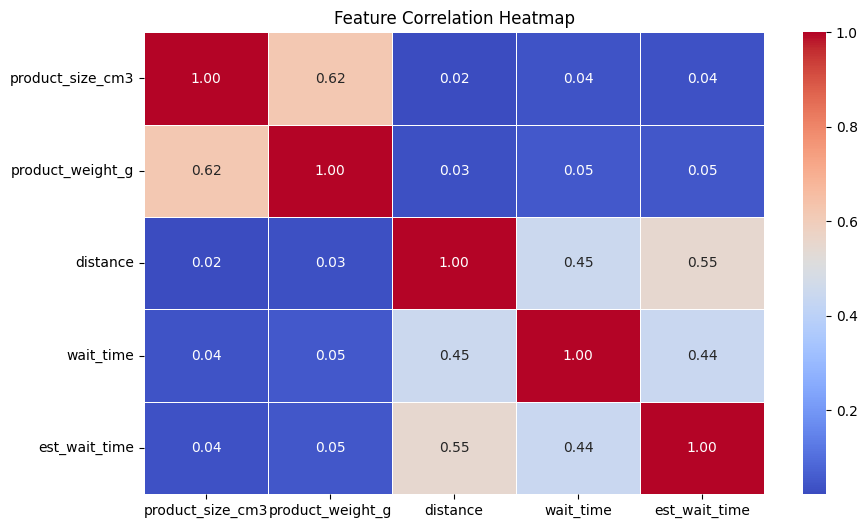

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = filtered_orders[num_cols].corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


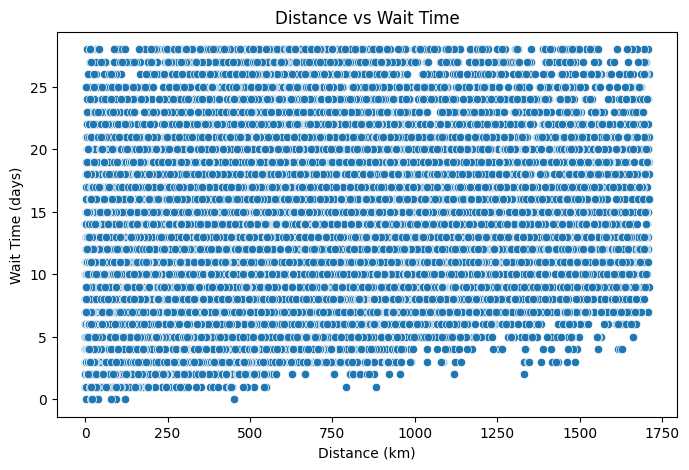

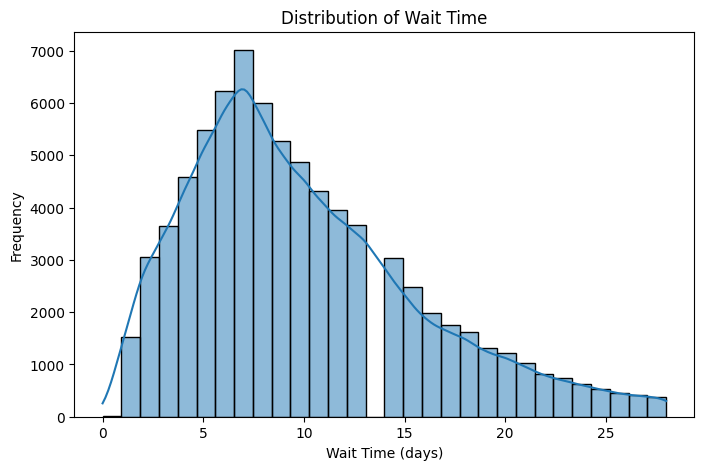

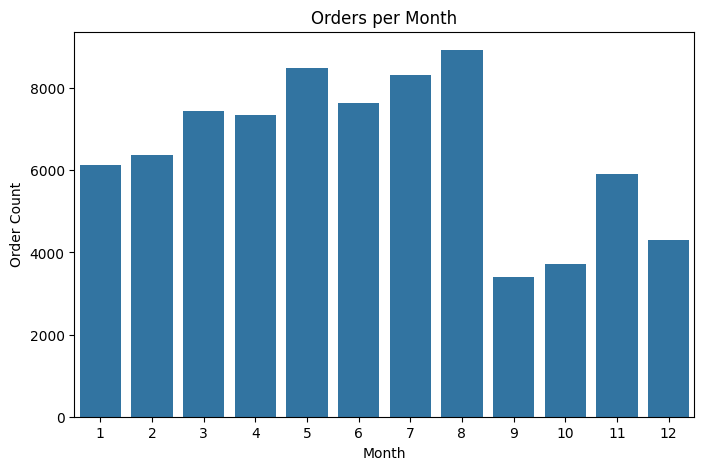

In [7]:
# Scatter plot: Distance vs Wait Time
plt.figure(figsize=(8, 5))
sns.scatterplot(x=filtered_orders['distance'], y=filtered_orders['wait_time'])
plt.title('Distance vs Wait Time')
plt.xlabel('Distance (km)')
plt.ylabel('Wait Time (days)')
plt.show()

# Histogram: Wait Time Distribution
plt.figure(figsize=(8, 5))
sns.histplot(filtered_orders['wait_time'], bins=30, kde=True)
plt.title('Distribution of Wait Time')
plt.xlabel('Wait Time (days)')
plt.ylabel('Frequency')
plt.show()

# Bar Chart: Orders per Month
plt.figure(figsize=(8, 5))
sns.countplot(x=filtered_orders['purchase_month'])
plt.title('Orders per Month')
plt.xlabel('Month')
plt.ylabel('Order Count')
plt.show()


In [8]:
from sklearn.model_selection import train_test_split

# Select features and target variable
X = filtered_orders[['product_size_cm3', 'product_weight_g', 'distance', 'wait_time', 'est_wait_time']]
y = filtered_orders['delay']  # Assuming 'delay' is the target variable

# Split into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train-Test Split Completed!")
print("Training Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)


Train-Test Split Completed!
Training Set Shape: (62418, 5)
Testing Set Shape: (15605, 5)
